## Demonstrando Teorema do Limite Central com distribuição normal

### Parâmetros da distribuição Normal
* Média = 5.83 <br>
* Desvio Padrão = 0.15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode, norm
import pandas as pd
from scipy.stats import shapiro

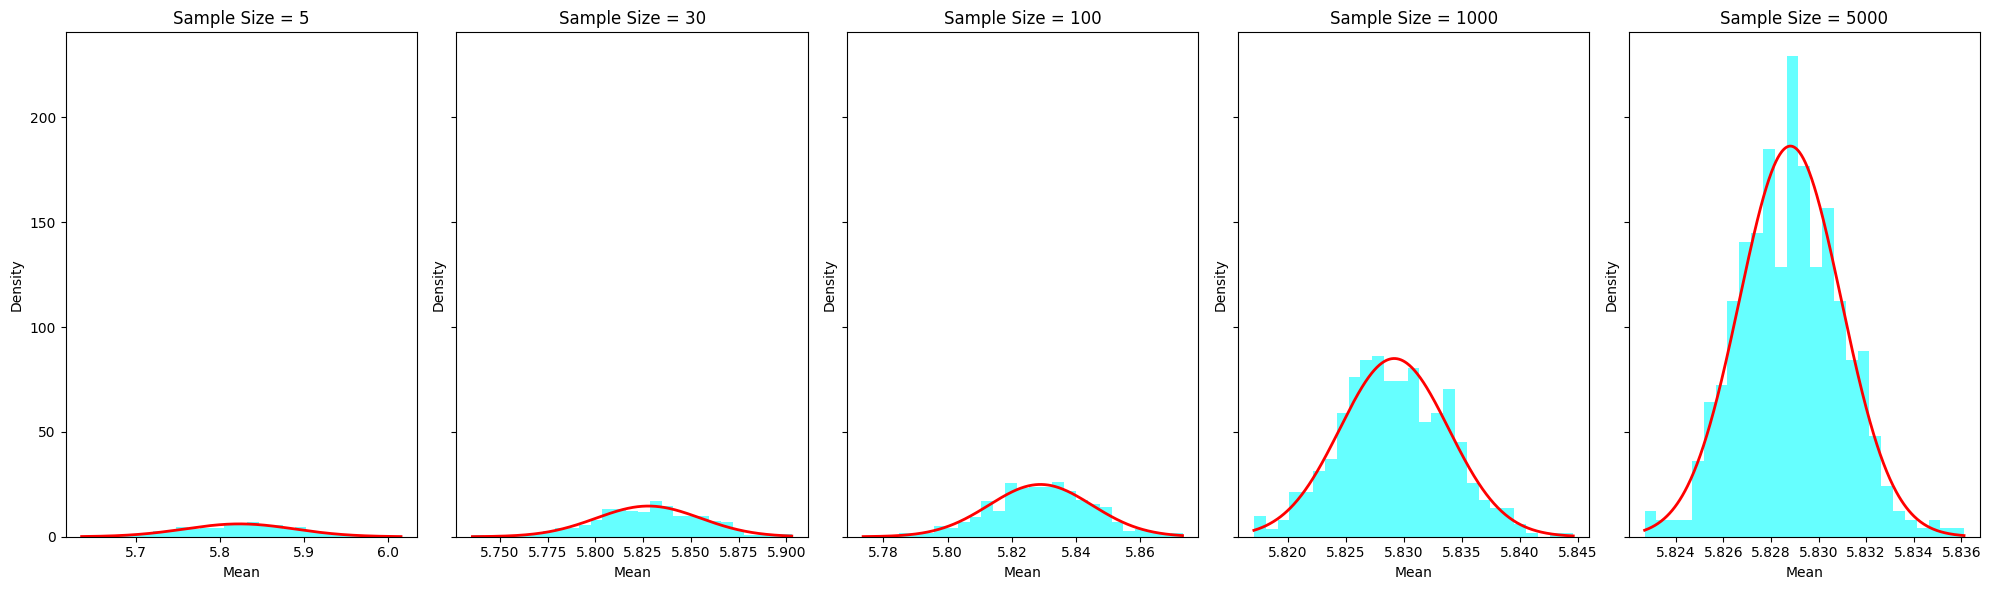

In [ ]:
mean = 5.83
std = 0.15

data = np.random.normal(mean, std, size=10000)

means = []
stds = []
meds = []
mods = []
z = []
p = []

sample_sizes = [5, 30, 100, 1000, 5000]
n_samples = 500

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
rice_bins = int(2 * len(data)**(1/3.5))

for i, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(data, size=size)) for _ in range(n_samples)]

    axes[i].hist(sample_means, bins=rice_bins, density=True, alpha=0.6, color='cyan')

    mu, std = np.mean(sample_means), np.std(sample_means)
    x = np.linspace(min(sample_means), max(sample_means), len(sample_means))

    z_scores = (sample_means - np.mean(sample_means)) / np.std(sample_means)

    means.append(round(mu,3))
    stds.append(round(std,3))
    meds.append(round(np.median(sample_means),3))
    mods.append(round(mode(sample_means).mode,3))
    z.append(z_scores)

    axes[i].plot(x, norm.pdf(x, mu, std), 'r-', lw=2)
    axes[i].set_title(f'Sample Size = {size}')
    axes[i].set_xlabel('Mean')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Análise

## Distribuição Normal Padrão e a Regra Empírica (68-95-99.7)
Em uma distribuição normal
* Aproximadamente 68% dos valores estão dentro de 1 desvio-padrão (|z| > 1),
* Aproximadamente 95% estão dentro de 2 desvios-padrão (|z| > 2), e
* Aproximadamente 99.7% estão dentro de 3 desvios-padrão (|z| > 3)

In [ ]:
print(15*'-' + f"Regra Empírica (68-95-99.7)" + 15*'-')

for i in range(len(z)):
  within_1_std = np.sum(np.abs(z[i]) < 1)
  within_2_std = np.sum(np.abs(z[i]) < 2)
  within_3_std = np.sum(np.abs(z[i]) < 3)

  total = len(z[i])
  percentage_1 = (within_1_std / total) * 100
  percentage_2 = (within_2_std / total) * 100
  percentage_3 = (within_3_std / total) * 100

  print(f'\nPopulação de tamanho = {sample_sizes[i]}')
  print(f"- Dentro de 1 desvio padrão (~68%): {percentage_1:.2f}%")
  print(f"- Dentro de 2 desvios padrão (~95%): {percentage_2:.2f}%")
  print(f"- Dentro de 3 desvios padrão (~99.7%): {percentage_3:.2f}%\n")


---------------Regra Empírica (68-95-99.7)---------------

População de tamanho = 5
- Dentro de 1 desvio padrão (~68%): 66.80%
- Dentro de 2 desvios padrão (~95%): 95.80%
- Dentro de 3 desvios padrão (~99.7%): 100.00%


População de tamanho = 30
- Dentro de 1 desvio padrão (~68%): 68.60%
- Dentro de 2 desvios padrão (~95%): 96.00%
- Dentro de 3 desvios padrão (~99.7%): 99.60%


População de tamanho = 100
- Dentro de 1 desvio padrão (~68%): 68.20%
- Dentro de 2 desvios padrão (~95%): 95.00%
- Dentro de 3 desvios padrão (~99.7%): 99.60%


População de tamanho = 1000
- Dentro de 1 desvio padrão (~68%): 68.40%
- Dentro de 2 desvios padrão (~95%): 95.40%
- Dentro de 3 desvios padrão (~99.7%): 99.60%


População de tamanho = 5000
- Dentro de 1 desvio padrão (~68%): 68.20%
- Dentro de 2 desvios padrão (~95%): 96.40%
- Dentro de 3 desvios padrão (~99.7%): 99.80%



Além disso, média, mediana e moda tendem a ser próximas

In [ ]:
statist = pd.DataFrame([sample_sizes, means, stds, meds, mods], index=['Sample Size', 'Mean', 'Std', 'Median', 'Mode']).T
statist

,Sample Size,Mean,Std,Median,Mode
0,5.0,5.823,0.065,5.826,5.636
1,30.0,5.828,0.027,5.829,5.736
2,100.0,5.829,0.016,5.829,5.774
3,1000.0,5.829,0.005,5.829,5.817
4,5000.0,5.829,0.002,5.829,5.823


### Análise
As distribuições apresentam uma forma simétrica com valores de média, moda e mediana próximas. O número de amostras das populações na demonstração é sempre 500, e observa-se que à medida que o tamanho da população aumenta o desvio padrão das amostras diminui, indicando o decaimento da dispersão dos dados. As medidas de tendência central (média, moda e mediana) também se aproximam do valor esperado de 5.83 conforme a população aumenta, demonsrando que as amostras se tornam mais representativas.
<br><br>
Nota-se que pequenos tamanhos de população tendem a ter flutuações maiores em relação à regra (68-95-99.7) devido à falta de representatividade do evento que se está observando (nesse caso, uma variável), mesmo todas as populações se tratando de distribuições normais com a mesma configuração de média e desvio padrão. No entanto, embora amostras vindas de populações maiores possam ser mais representativas, o risco de ruídos nos dados também tende a ser maior.